/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


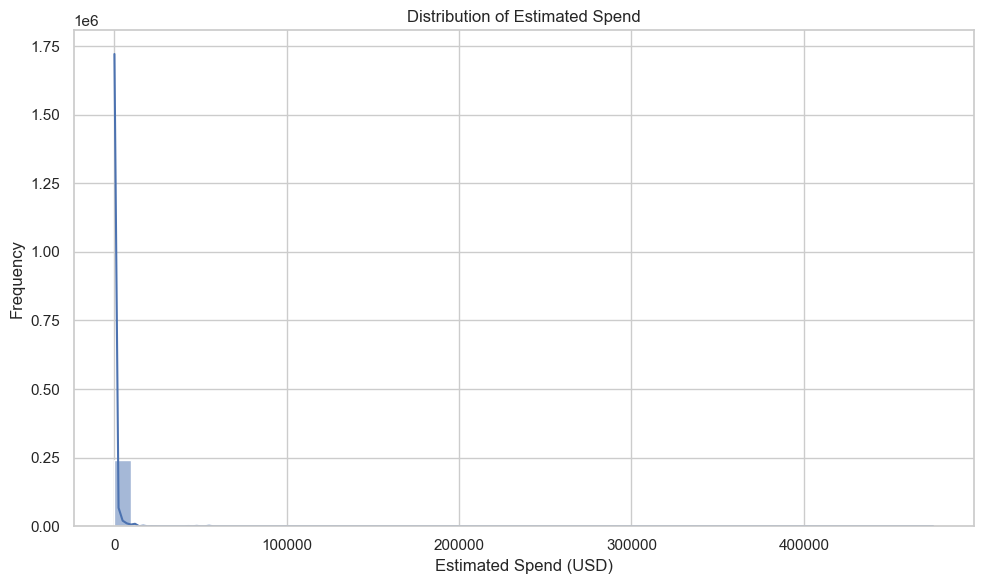

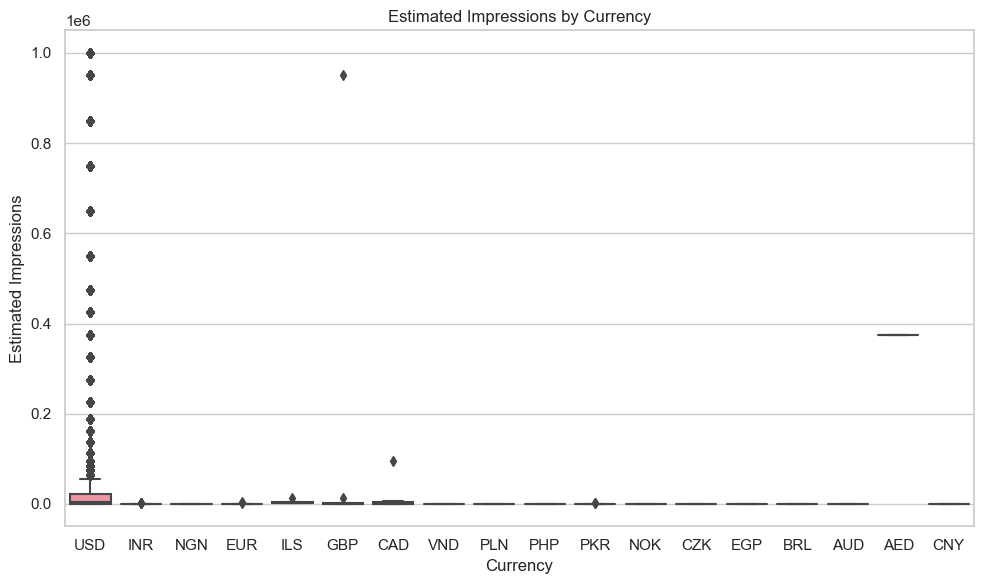

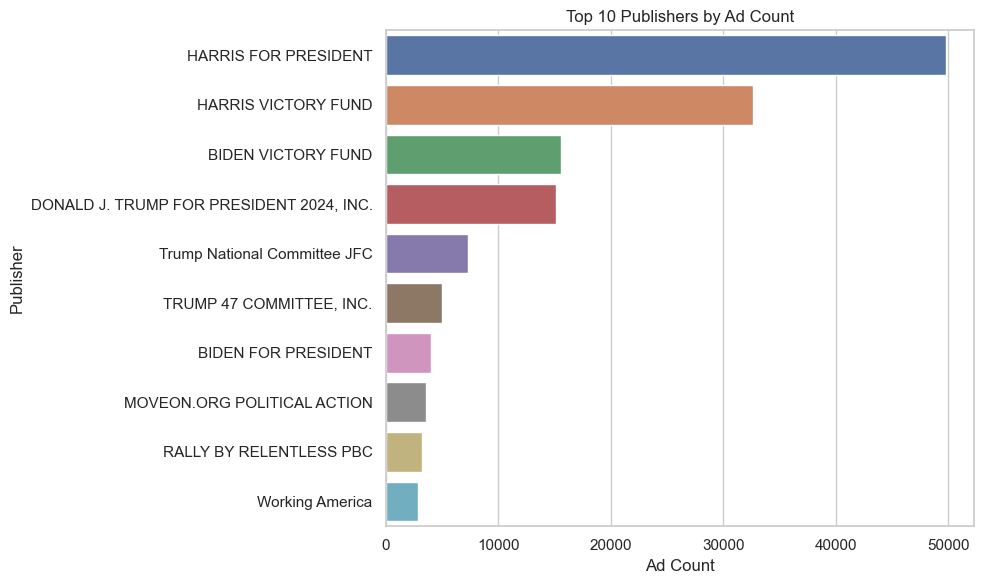

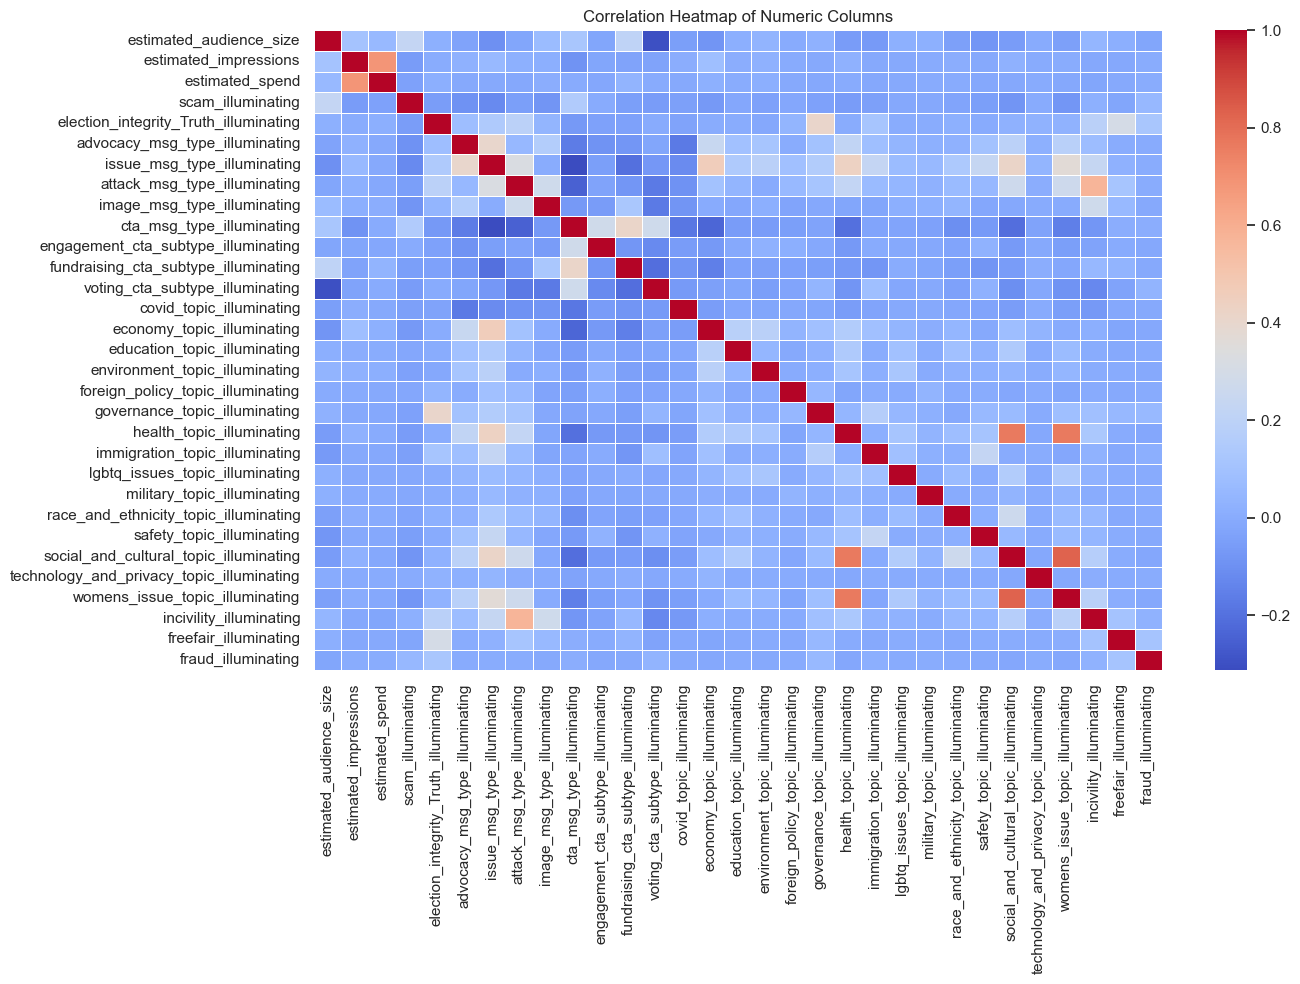

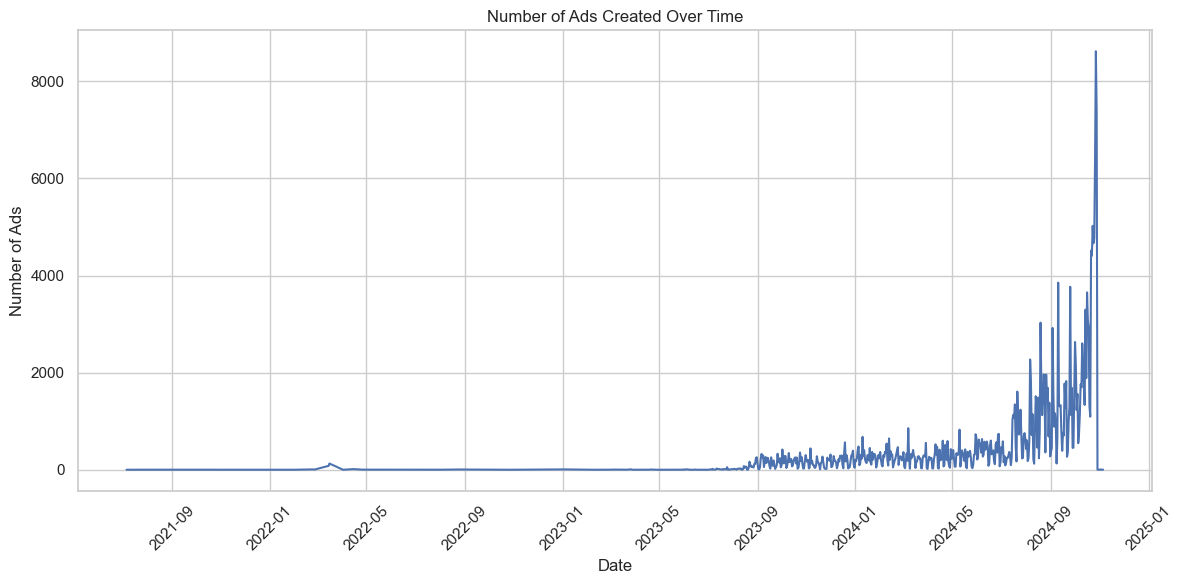

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024_fb_ads_president_scored_anon.csv'
df = pd.read_csv(file_path)

# Set general style
sns.set(style="whitegrid")

# --------------------------
# Histogram for Estimated Spend
# --------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['estimated_spend'], bins=50, kde=True)
plt.title('Distribution of Estimated Spend')
plt.xlabel('Estimated Spend (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --------------------------
#  Boxplot for Estimated Impressions by Currency
# --------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='currency', y='estimated_impressions', data=df)
plt.title('Estimated Impressions by Currency')
plt.xlabel('Currency')
plt.ylabel('Estimated Impressions')
plt.tight_layout()
plt.show()

# --------------------------
# Top 10 Publishers by Ad Count (barplot)
# --------------------------
top_publishers = df['bylines'].value_counts().head(10)
top_publishers_df = top_publishers.reset_index()
top_publishers_df.columns = ['bylines', 'ad_count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_publishers_df, y='bylines', x='ad_count', orient='h')
plt.title('Top 10 Publishers by Ad Count')
plt.xlabel('Ad Count')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# --------------------------
# Correlation Heatmap of Numeric Features
# --------------------------
numeric_cols = df.select_dtypes(include=['number'])
corr = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

# --------------------------
# Time Trend: Ads over Time (Optional if 'ad_creation_time' is clean)
# --------------------------
df['ad_creation_time'] = pd.to_datetime(df['ad_creation_time'], errors='coerce')
ads_per_day = df['ad_creation_time'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
ads_per_day.plot()
plt.title('Number of Ads Created Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
